<a href="https://colab.research.google.com/github/Whatever929/kaggle_notebook/blob/main/VideoGamesList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The dataset can be found in https://www.kaggle.com/amoghrrao2/video-games-list/code

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
%run '/content/drive/MyDrive/Colab Notebooks/setup.ipynb'

In [2]:
upload_files()

Saving Windows_Games_List.csv to Windows_Games_List.csv


In [5]:
original = pd.read_csv("/content/Windows_Games_List.csv")
df = original.copy()

In [6]:
df

,titles,released,developers,publishers,genres
0,101 Dalmatians: Escape from DeVil Manor,1999,DreamForge Intertainment,Disney Interactive,"Puzzle', 'Strategy', 'Adventure'"
1,102 Dalmatians: Puppies to the Rescue,2000,Crystal Dynamics,Eidos Interactive,"Platform', 'Adventure'"
2,140,2016,Double Fine Productions,Abstraction Games,"Music', 'Platform', 'Puzzle', 'Strategy', 'Indie'"
3,1001 Spikes,2014,8bits Fanatics,Nicalis,"Platform', 'Adventure', 'Indie'"
4,The 11th Hour,1995,Trilobyte,Virgin Interactive,"Point-and-click', 'Puzzle', 'Adventure'"
...,...,...,...,...,...
3812,Zork Nemesis,1996,Zombie Studios,Activision,Adventure'
3813,Zork: Grand Inquisitor,1997,Activision,Activision,"Point-and-click', 'Adventure'"
3814,Zuma,2003,PopCap Games,PopCap Games,"Simulator', 'Adventure'"
3815,Zwei!!,2002,Nihon Falcom,Nihon Falcom,"Shooter', 'Adventure'"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   titles      3817 non-null   object
 1   released    3817 non-null   object
 2   developers  3813 non-null   object
 3   publishers  3749 non-null   object
 4   genres      3817 non-null   object
dtypes: object(5)
memory usage: 149.2+ KB


In [14]:
# Below shows video games with unknown developers.
# The missing values for these games can easily be found through google search.
# For example, https://en.wikipedia.org/wiki/Breakout_2000 for Breakout 2000. 
df[df.isna()['developers']]

,titles,released,developers,publishers,genres
407,Breakout,2000,NaN,NaN,Indie'
2015,Magic: The Gathering: BattleMage,1997,NaN,Acclaim Entertainment,Real Time Strategy (RTS)'
2330,Netrek,1996,NaN,NaN,"Real Time Strategy (RTS)', 'Simulator', 'Sport..."
2403,Omega,2003,NaN,NaN,Indie'


In [16]:
# For convenience, we will drop games with missing values first.
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3748 entries, 0 to 3816
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   titles      3748 non-null   object
 1   released    3748 non-null   object
 2   developers  3748 non-null   object
 3   publishers  3748 non-null   object
 4   genres      3748 non-null   object
dtypes: object(5)
memory usage: 175.7+ KB


Text(0.5, 1.01, 'Number of Windows video games published every year')

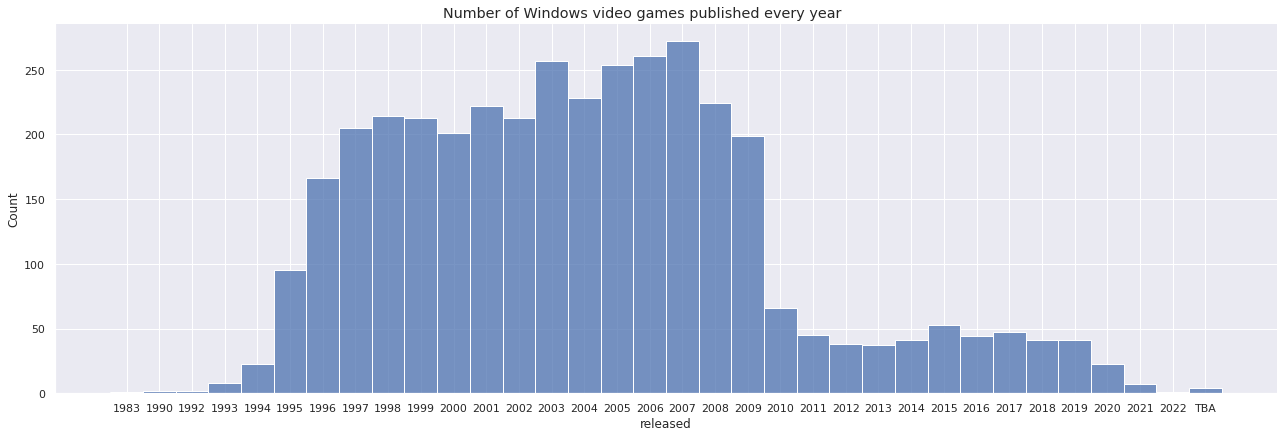

In [46]:
g = sns.displot(data=df_clean, x=df_clean['released'].sort_values(), height=6, aspect=3)
g.fig.suptitle("Number of Windows video games published every year", y = 1.01)

In [ ]:
# We see that the number of video games published decreased sharply in 2010, and continued to drop after it.
# This is highly unrealistic. A simple search of Windows video games on Steam (https://store.steampowered.com/search/?sort_by=Released_DESC&os=win) reveals that
# that are more than 100 games published in year 2021. 

# Thus, without knowing how the data is collected, we cannot be sure of how representative of our data to the Windows video games industry.

Text(0.5, 1.0, 'Top 10 Developers with most video games')

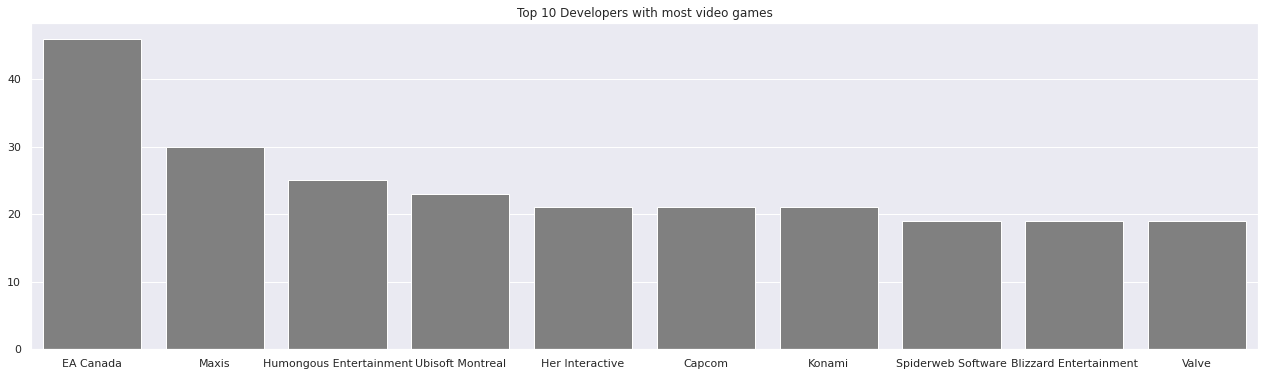

In [64]:
plt.figure(figsize=(22, 6))
top_10 = df_clean['developers'].value_counts()[0:10]
ax = sns.barplot(x=top_10.index, y=top_10.values, color='grey')
ax.set_title("Top 10 Developers with most video games")

Text(0.5, 1.0, 'Top 10 Publishers with most published video games')

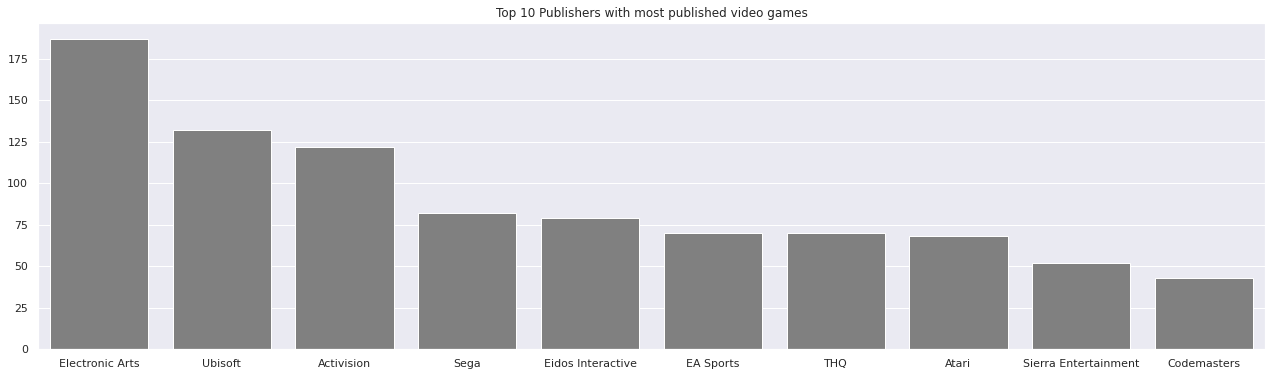

In [67]:
plt.figure(figsize=(22, 6))
top_10 = df_clean['publishers'].value_counts()[0:10]
ax = sns.barplot(x=top_10.index, y=top_10.values, color='grey')
ax.set_title("Top 10 Publishers with most published video games")

In [99]:
from collections import Counter

counter = Counter()

df_genres = genres_list = df_clean['genres'].apply(lambda x: x.replace("'", "").replace('"', "").replace(" ", "").split(','))
for i in genres_list:
  counter.update(i)

In [84]:
count_series = pd.Series(counter).sort_values(ascending=False)
count_series

Adventure                  1135
Strategy                    939
Simulator                   774
Shooter                     671
Role-playing(RPG)           508
Sport                       435
Indie                       403
Racing                      347
Puzzle                      340
RealTimeStrategy(RTS)       262
Platform                    256
Arcade                      174
Point-and-click             168
Tactical                    140
Turn-basedstrategy(TBS)     137
Fighting                    116
Hackandslash/Beatemup       112
VisualNovel                  48
Music                        37
Card&BoardGame               22
Quiz/Trivia                  21
Pinball                      16
MOBA                          1
dtype: int64

Text(0.5, 1.0, '10 Most Popular Genres')

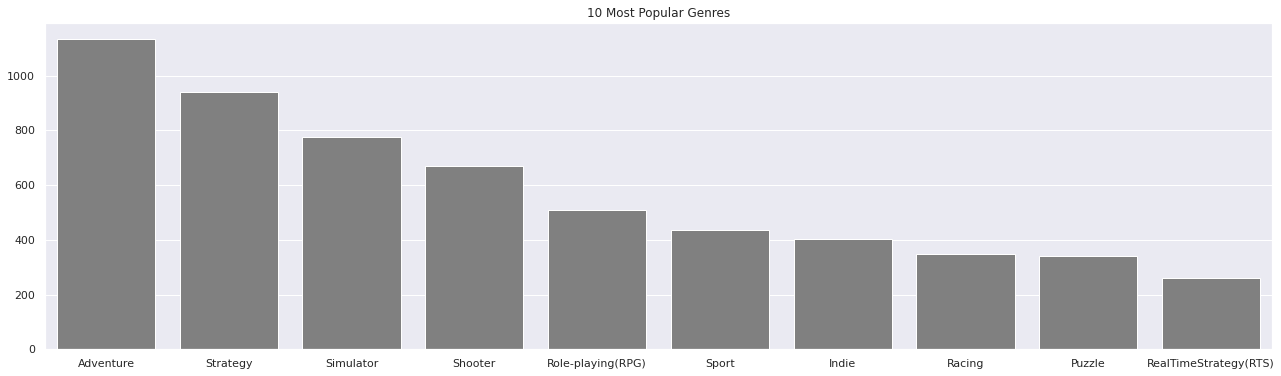

In [91]:
plt.figure(figsize=(22, 6))
ax = sns.barplot(x=count_series[0:10].index, y=count_series[0:10].values, color='grey')
ax.set_title("10 Most Popular Genres")

Text(0.5, 1.0, '10 Least Popular Genres')

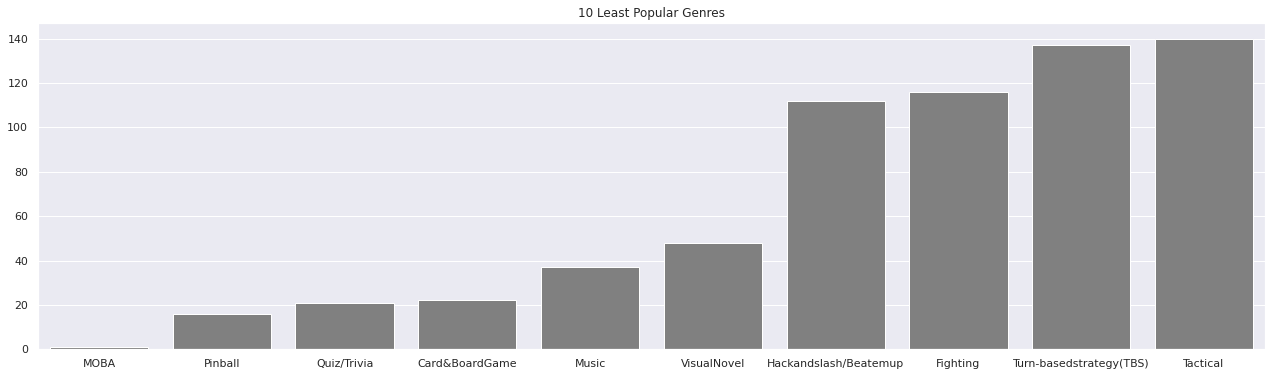

In [95]:
plt.figure(figsize=(22, 6))
ax = sns.barplot(x=count_series[-1:-11:-1].index, y=count_series[-1:-11:-1].values, color='grey')
ax.set_title("10 Least Popular Genres")

In [ ]:
# Just now we have seen that a video game may be assigned multiple genres. 
# If we examine closely the genres column, we can find that some pair of genres tend to go together. For example, Real Time Strategy (RTS) and Strategy genres tend to go together.

In [135]:
df_genres[df_genres.apply(lambda x: ("RealTimeStrategy(RTS)" in x) and ("Strategy" in x))]

24                      [RealTimeStrategy(RTS), Strategy]
34                      [RealTimeStrategy(RTS), Strategy]
35                      [RealTimeStrategy(RTS), Strategy]
55                      [RealTimeStrategy(RTS), Strategy]
56           [RealTimeStrategy(RTS), Simulator, Strategy]
                              ...                        
3730                    [RealTimeStrategy(RTS), Strategy]
3751    [RealTimeStrategy(RTS), Strategy, Turn-basedst...
3754         [RealTimeStrategy(RTS), Simulator, Strategy]
3788                    [RealTimeStrategy(RTS), Strategy]
3789                    [RealTimeStrategy(RTS), Strategy]
Name: genres, Length: 243, dtype: object

In [136]:
df_genres[df_genres.apply(lambda x: "RealTimeStrategy(RTS)" in x)]

24                 [RealTimeStrategy(RTS), Strategy]
34                 [RealTimeStrategy(RTS), Strategy]
35                 [RealTimeStrategy(RTS), Strategy]
55                 [RealTimeStrategy(RTS), Strategy]
56      [RealTimeStrategy(RTS), Simulator, Strategy]
                            ...                     
3789               [RealTimeStrategy(RTS), Strategy]
3799                         [RealTimeStrategy(RTS)]
3802                         [RealTimeStrategy(RTS)]
3808                         [RealTimeStrategy(RTS)]
3810                         [RealTimeStrategy(RTS)]
Name: genres, Length: 262, dtype: object

In [128]:
unique_genres = count_series.index

genres_data = []
for i in unique_genres:
  i_to_j_portion = []
  i_count = sum(df_genres.apply(lambda x: i in x))
  for j in unique_genres:
    j_count = sum(df_genres.apply(lambda x: (i in x) and (j in x)))
    i_to_j_portion.append(j_count / i_count)
  genres_data.append(i_to_j_portion)

df_genres_ratio = pd.DataFrame(genres_data, index= unique_genres, columns = unique_genres)

In [ ]:
# Example of reading df_genres_ratio:
# 0.441587 in row "Indie" and column "Adventures" means around 44% of all Indie games are also labelled as Adventure games
# 0.927481 in row "RealTimeStrategy(RTS)" and column "Strategy" means around 93% of all RTS games are also Strategy games.

In [129]:
df_genres_ratio

,Adventure,Strategy,Simulator,Shooter,Role-playing(RPG),Sport,Indie,Racing,Puzzle,RealTimeStrategy(RTS),Platform,Arcade,Point-and-click,Tactical,Turn-basedstrategy(TBS),Fighting,Hackandslash/Beatemup,VisualNovel,Music,Card&BoardGame,Quiz/Trivia,Pinball,MOBA
Adventure,1.000000,0.107489,0.073128,0.120705,0.185022,0.018502,0.156828,0.035242,0.157709,0.014097,0.136564,0.035242,0.138326,0.015859,0.009692,0.021145,0.051101,0.024670,0.007930,0.000881,0.002643,0.000881,0.000000
Strategy,0.129925,1.000000,0.335463,0.056443,0.148030,0.041534,0.135250,0.012780,0.066028,0.258786,0.013845,0.014909,0.006390,0.090522,0.115016,0.014909,0.005325,0.002130,0.004260,0.015974,0.007455,0.000000,0.001065
Simulator,0.107235,0.406977,1.000000,0.111111,0.064599,0.220930,0.100775,0.130491,0.024548,0.085271,0.005168,0.020672,0.005168,0.041344,0.027132,0.007752,0.001292,0.003876,0.003876,0.000000,0.003876,0.001292,0.000000
Shooter,0.204173,0.078987,0.128167,1.000000,0.076006,0.055142,0.061103,0.043219,0.028316,0.016393,0.038748,0.058122,0.001490,0.081967,0.001490,0.020864,0.013413,0.000000,0.004471,0.000000,0.000000,0.000000,0.000000
Role-playing(RPG),0.413386,0.273622,0.098425,0.100394,1.000000,0.017717,0.151575,0.009843,0.027559,0.039370,0.035433,0.013780,0.017717,0.057087,0.080709,0.029528,0.066929,0.009843,0.001969,0.001969,0.001969,0.000000,0.000000
Sport,0.048276,0.089655,0.393103,0.085057,0.020690,1.000000,0.027586,0.197701,0.022989,0.009195,0.011494,0.027586,0.000000,0.004598,0.011494,0.016092,0.004598,0.000000,0.000000,0.002299,0.006897,0.002299,0.000000
Indie,0.441687,0.315136,0.193548,0.101737,0.191067,0.029777,1.000000,0.054591,0.126551,0.022333,0.133995,0.091811,0.042184,0.014888,0.027295,0.024814,0.027295,0.007444,0.022333,0.002481,0.002481,0.002481,0.000000
Racing,0.115274,0.034582,0.291066,0.083573,0.014409,0.247839,0.063401,1.000000,0.011527,0.002882,0.028818,0.074928,0.005764,0.002882,0.002882,0.020173,0.008646,0.000000,0.002882,0.000000,0.000000,0.002882,0.000000
Puzzle,0.526471,0.182353,0.055882,0.055882,0.041176,0.029412,0.150000,0.011765,1.000000,0.002941,0.144118,0.073529,0.182353,0.008824,0.020588,0.011765,0.014706,0.011765,0.011765,0.008824,0.023529,0.005882,0.000000
RealTimeStrategy(RTS),0.061069,0.927481,0.251908,0.041985,0.076336,0.015267,0.034351,0.003817,0.003817,1.000000,0.000000,0.003817,0.003817,0.110687,0.041985,0.026718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


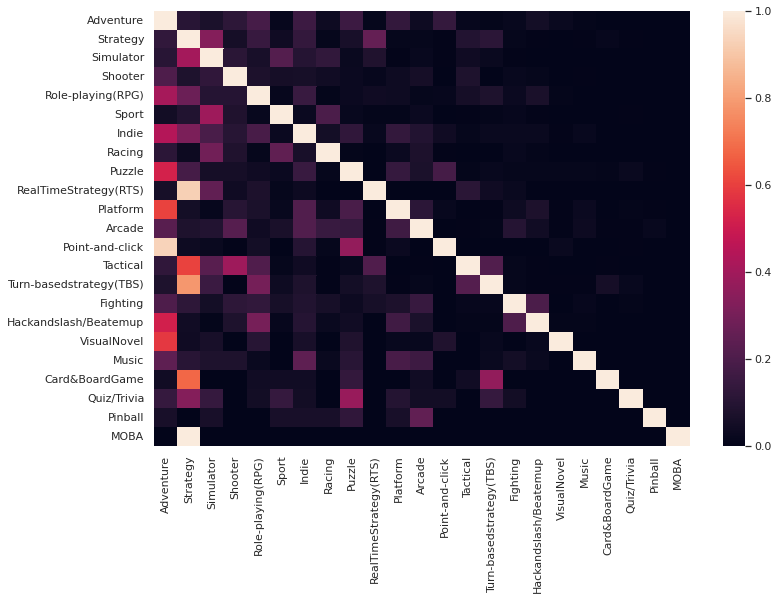

In [144]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_genres_ratio)